**importing the required Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***importing Dataset***

In [3]:
df = pd.read_csv(r"C:\Users\ABHI\Downloads\car_evaluation.csv")


In [4]:
#dimension of dataset
df.shape

(1727, 7)

there are 1727 records and 7 columns in total

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


**Rename Columns Names**

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

checking the names of columns after changes

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Info of Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())   


high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


Exploring Class Variable

In [10]:
df["class"].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

**Missing Values**

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [12]:
buy_dummy = pd.get_dummies(df['buying'])
buy_dummy = pd.get_dummies(df['buying'],drop_first=True)

In [13]:
main_dummy = pd.get_dummies(df['maint'])
main_dummy = pd.get_dummies(df['maint'],drop_first=True)

In [14]:
door_dummy = pd.get_dummies(df['doors'])
door_dummy = pd.get_dummies(df['doors'],drop_first=True)

In [15]:
person_dummy = pd.get_dummies(df['persons'])
person_dummy = pd.get_dummies(df['persons'],drop_first=True)

In [16]:
lug_dummy = pd.get_dummies(df['lug_boot'])
lug_dummy = pd.get_dummies(df['lug_boot'],drop_first=True)

In [17]:
safe_dummy = pd.get_dummies(df['safety'])
safe_dummy = pd.get_dummies(df['safety'],drop_first=True)

In [18]:
df = pd.concat([df,buy_dummy,main_dummy,door_dummy,person_dummy,lug_dummy,safe_dummy],axis=1)

In [19]:
df

,buying,maint,doors,persons,lug_boot,safety,class,low,med,vhigh,...,vhigh,3,4,5more,4,more,med,small,low,med
0,vhigh,vhigh,2,2,small,med,unacc,0,0,1,...,1,0,0,0,0,0,0,1,0,1
1,vhigh,vhigh,2,2,small,high,unacc,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,vhigh,vhigh,2,2,med,low,unacc,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,vhigh,vhigh,2,2,med,med,unacc,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,vhigh,vhigh,2,2,med,high,unacc,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good,1,0,0,...,0,0,0,1,0,1,1,0,0,1
1723,low,low,5more,more,med,high,vgood,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1724,low,low,5more,more,big,low,unacc,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1725,low,low,5more,more,big,med,good,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [20]:
df.drop(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],axis=1,inplace=True)

In [21]:
df.head()

,class,low,med,vhigh,low,med,vhigh,3,4,5more,4,more,med,small,low,med
0,unacc,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
1,unacc,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,unacc,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
3,unacc,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,unacc,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [22]:
x = df.drop(['class'],axis=1)

y = df['class']

***Splitting the Data Into Training and Testing Sets***

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# **13. Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>

In [24]:
#importing Decision tree Classfier

from sklearn.tree import DecisionTreeClassifier

In [25]:
#using the DecisionTreeClassifier model with criterion gini 

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Prdicting result with Model


In [26]:
y_pred = clf_gini.predict(x_test)

#### Checking accuracy score 

In [27]:
from sklearn.metrics import accuracy_score

print('THe Accuracy Score of Decision tree model with gini criterion is :',accuracy_score(y_pred,y_test)*100)


THe Accuracy Score of Decision tree model with gini criterion is : 80.73217726396918


In [28]:
y_pred_train = clf_gini.predict(x_train)

print('Train Score with Model :',accuracy_score(y_pred_train,y_train)*100)

Train Score with Model : 78.47682119205298


### There is NO sign Of overfitting

#### plotting And Visualizing The Tree

[Text(418.5, 380.52, 'X[13] <= 0.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(334.8, 271.8, 'X[9] <= 0.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(167.4, 163.07999999999998, 'X[10] <= 0.5\ngini = 0.49\nsamples = 522\nvalue = [127, 25, 349, 21]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.635\nsamples = 271\nvalue = [127, 25, 98, 21]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.627\nsamples = 276\nvalue = [139, 27, 89, 21]'),
 Text(418.5, 54.360000000000014, 'gini = 0.619\nsamples = 209\nvalue = [116, 27, 45, 21]'),
 Text(585.9, 54.360000000000014, 'gini = 0.451\nsamples = 67\nvalue = [23, 0, 44, 0]'),
 Text(502.20000000000005, 271.8, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]')]

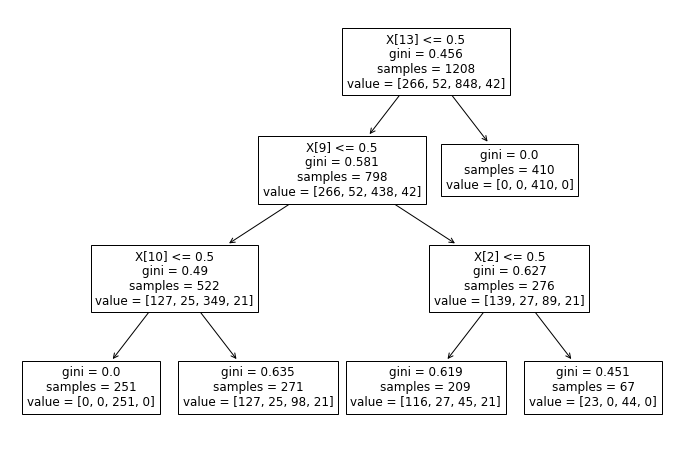

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf_en =DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [32]:
clf_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [33]:
y_pred1 = clf_en.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print('The Accuracy score with Entropy criterion is :',accuracy_score(y_test,y_pred1))

The Accuracy score with Entropy criterion is : 0.8015414258188824
